In [10]:
import pandas as pd
from matplotlib import pyplot as plt

# Muat Dataset

In [91]:
df = pd.read_csv('DATASET\data_pasien_diabetes.csv')
df.head()

,id_pasien,nama,usia,tekanan_darah,kadar_gula,jenis_kelamin,alamat,diagnosa
0,P0001,Anto Sartika,62.0,123.0,127.0,laki-laki,"Jl. Melur No.71, Medan",Pra-diabetes
1,P0002,Nina Wati,70.0,121.0,169.0,Laki,"Jalan Kenanga No.26, Medan",Diabetes Tipe 2
2,P0003,Rahmat Aminah,38.0,100.0,161.0,Laki,"Jl. Melur No.47, Surabaya",Pra-diabetes
3,P0004,Siti Saputra,25.0,100.0,166.0,L,"Jl. Anggrek No.52, Medan",Tidak Diabetes
4,P0005,Andi Wati,49.0,110.0,131.0,perempuan,"Perum Griya Indah No.74, Medan",Diabetes Tipe 2


# Deteksi Missing Value

In [92]:
print("Jumlah Missing Value per kolom:")
print(df.isnull().sum())

Jumlah Missing Value per kolom:
id_pasien         0
nama              0
usia             16
tekanan_darah    17
kadar_gula       22
jenis_kelamin     0
alamat           45
diagnosa          0
dtype: int64


## Visualisasi Sebelum Data Dibersihkan

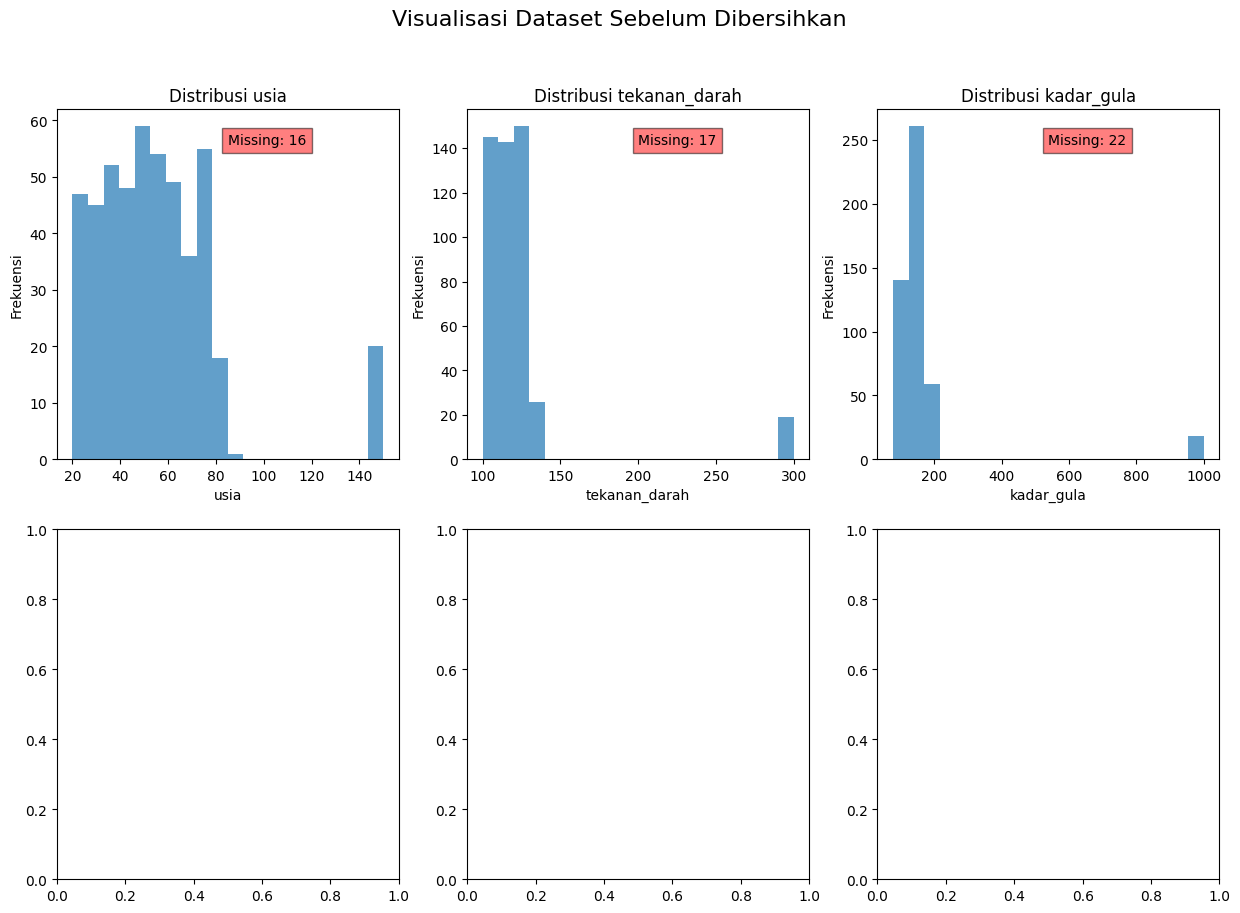

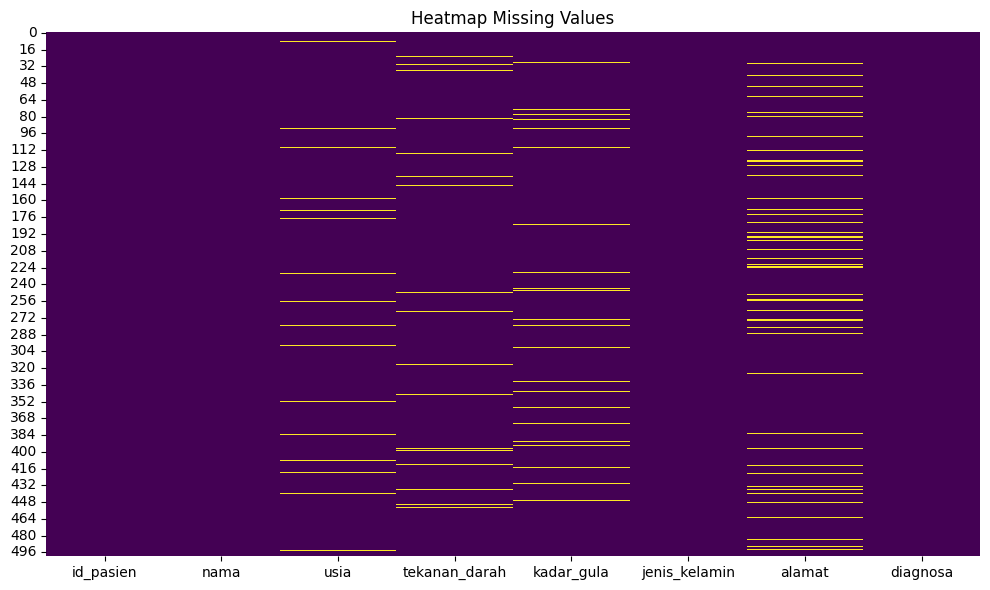

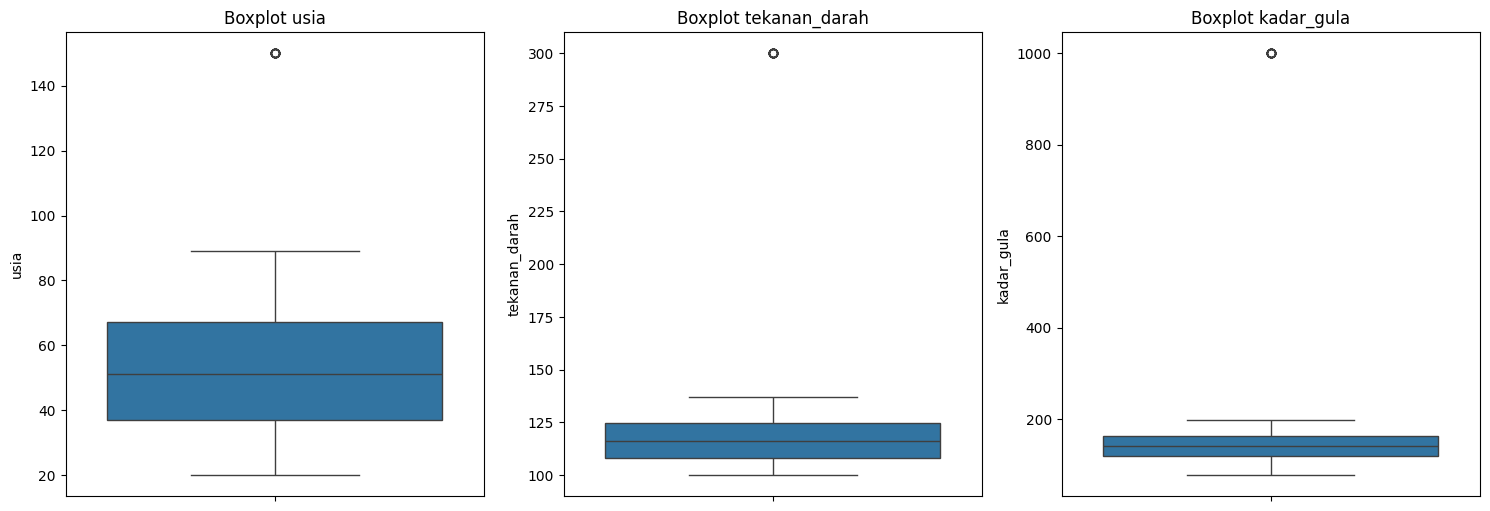

In [43]:
# Visualisasi distribusi data dengan missing values
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Visualisasi Dataset Sebelum Dibersihkan', fontsize=16)

# Flattening axes array untuk memudahkan iterasi
axes = axes.flatten()

# Visualisasi untuk setiap kolom numerik
cols = df.select_dtypes(include=['float64', 'int64']).columns
for i, col in enumerate(cols):
    if i < len(axes):  # Pastikan tidak melebihi jumlah subplot
        # Histogram
        axes[i].hist(df[col].dropna(), bins=20, alpha=0.7)
        axes[i].set_title(f'Distribusi {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frekuensi')
        
        # Tunjukkan jumlah missing values
        missing = df[col].isnull().sum()
        if missing > 0:
            axes[i].text(0.5, 0.9, f'Missing: {missing}', 
                         transform=axes[i].transAxes, 
                         bbox=dict(facecolor='red', alpha=0.5))

# Visualisasi heatmap missing values
plt.figure(figsize=(10, 6))
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap Missing Values')
plt.tight_layout()
plt.show()

# Boxplot untuk deteksi outlier
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col].dropna())
    plt.title(f'Boxplot {col}')

plt.tight_layout()
plt.show()

## Menangani beberapa Missing Value

In [93]:
df['usia'] = df['usia'].fillna(df['usia'].mean())
df['kadar_gula'] = df['kadar_gula'].fillna(df['kadar_gula'].median())
df['alamat'] = df['alamat'].fillna(df['alamat'].mode()[0])
df['tekanan_darah'] = df['tekanan_darah'].fillna(df['tekanan_darah'].median())
print("\nSetelah diisi dengan rata-rata:")
print(df.isnull().sum())


Setelah diisi dengan rata-rata:
id_pasien        0
nama             0
usia             0
tekanan_darah    0
kadar_gula       0
jenis_kelamin    0
alamat           0
diagnosa         0
dtype: int64


In [94]:
df.head(10)

,id_pasien,nama,usia,tekanan_darah,kadar_gula,jenis_kelamin,alamat,diagnosa
0,P0001,Anto Sartika,62.000000,123.0,127.0,laki-laki,"Jl. Melur No.71, Medan",Pra-diabetes
1,P0002,Nina Wati,70.000000,121.0,169.0,Laki,"Jalan Kenanga No.26, Medan",Diabetes Tipe 2
2,P0003,Rahmat Aminah,38.000000,100.0,161.0,Laki,"Jl. Melur No.47, Surabaya",Pra-diabetes
3,P0004,Siti Saputra,25.000000,100.0,166.0,L,"Jl. Anggrek No.52, Medan",Tidak Diabetes
4,P0005,Andi Wati,49.000000,110.0,131.0,perempuan,"Perum Griya Indah No.74, Medan",Diabetes Tipe 2
5,P0006,Linda Prasetyo,40.000000,122.0,137.0,laki-laki,"Jl. Anggrek No.3, Bandung",Tidak Diabetes
6,P0007,Rudi Agustin,57.000000,114.0,125.0,perempuan,"Jl. Melur No.15, Bandung",Tidak Diabetes
7,P0008,Rahmat Wati,69.000000,120.0,150.0,L,"Jl. Melur No.59, Jakarta",Diabetes Tipe 2
8,P0009,Rudi Aminah,54.442149,108.0,149.0,L,"Jalan Mawar No.40, Bandung",Diabetes Tipe 2
9,P0010,Siti Saputra,71.000000,125.0,120.0,p,"Jl. Merdeka No.19, Yogyakarta",Pra-diabetes


# Deteksi Outlier

Jumlah outlier per kolom (metode Z-score):
usia: 20 outlier
tekanan_darah: 19 outlier
kadar_gula: 18 outlier


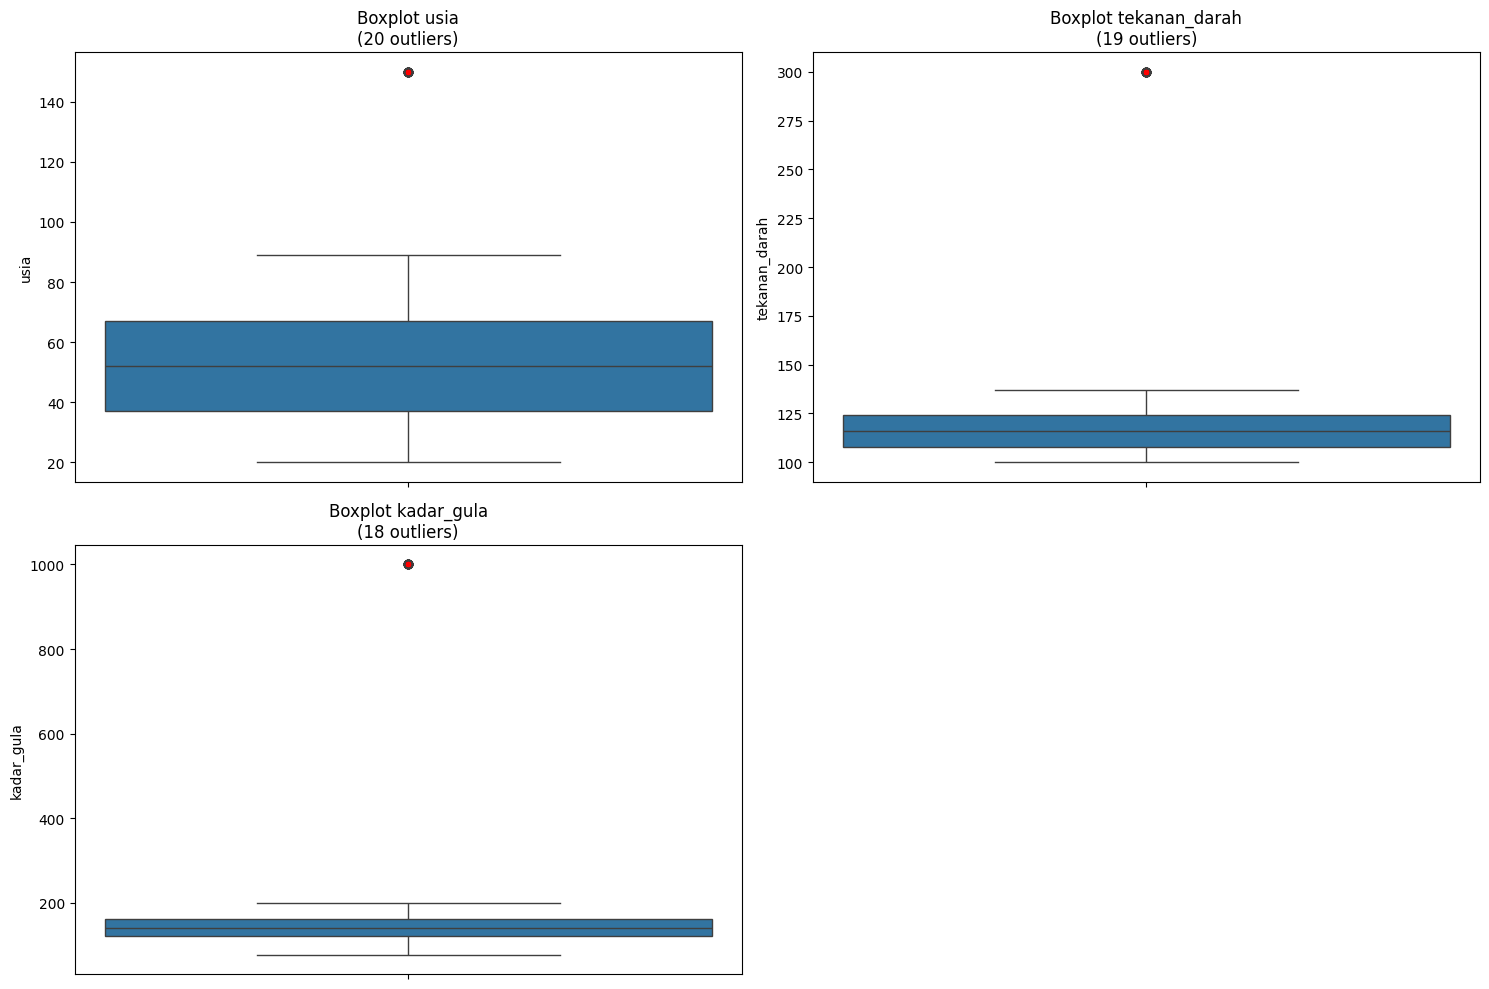

In [95]:
import numpy as np
from scipy import stats

# Fungsi untuk mendeteksi outlier dengan z-score
def detect_outliers_zscore(df, columns, threshold=3):
    outliers_dict = {}
    outlier_indices = {}
    
    for col in columns:
        # Hitung z-score
        z_scores = np.abs(stats.zscore(df[col].dropna()))
        
        # Temukan indeks outlier
        outliers = np.where(z_scores > threshold)[0]
        
        # Simpan jumlah dan indeks outlier
        outliers_dict[col] = len(outliers)
        outlier_indices[col] = outliers
        
    return outliers_dict, outlier_indices

# Kolom numerik untuk deteksi outlier
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Deteksi outlier
outliers_count, outlier_indices = detect_outliers_zscore(df, numeric_cols)

# Tampilkan hasil
print("Jumlah outlier per kolom (metode Z-score):")
for col, count in outliers_count.items():
    print(f"{col}: {count} outlier")

# Visualisasi dengan boxplot
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, len(numeric_cols)//2 + 1, i+1)
    
    # Plot boxplot
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot {col}\n({outliers_count[col]} outliers)')
    
    # Highlight outliers dengan metode z-score
    if outliers_count[col] > 0:
        # Dapatkan indeks asli (setelah menghilangkan NaN)
        outlier_values = df[col].dropna().iloc[outlier_indices[col]]
        plt.scatter(x=[0]*len(outlier_values), y=outlier_values, 
                    color='red', s=20, alpha=0.5)

plt.tight_layout()
plt.show()

## Tangani Outlier dengan Teknik Capping

Jumlah outlier yang ditemukan per kolom:
  usia: 20 outlier
  kadar_gula: 18 outlier
  tekanan_darah: 19 outlier
Total baris yang dihapus: 51
Jumlah baris sebelum pembersihan: 500
Jumlah baris setelah pembersihan: 448

Statistik sebelum pembersihan:
             usia   kadar_gula  tekanan_darah
count  500.000000   500.000000     500.000000
mean    54.442149   170.870000     122.574000
std     25.749424   162.189865      36.386157
min     20.000000    78.000000     100.000000
25%     37.000000   121.000000     108.000000
50%     52.000000   142.000000     116.000000
75%     67.000000   163.000000     124.000000
max    150.000000  1000.000000     300.000000

Statistik setelah pembersihan:
             usia  kadar_gula  tekanan_darah
count  448.000000  448.000000     448.000000
mean    50.568376  139.685268     115.517857
std     17.036562   24.402416       9.026416
min     20.000000   78.000000     100.000000
25%     37.000000  120.000000     108.000000
50%     51.000000  142.000000     

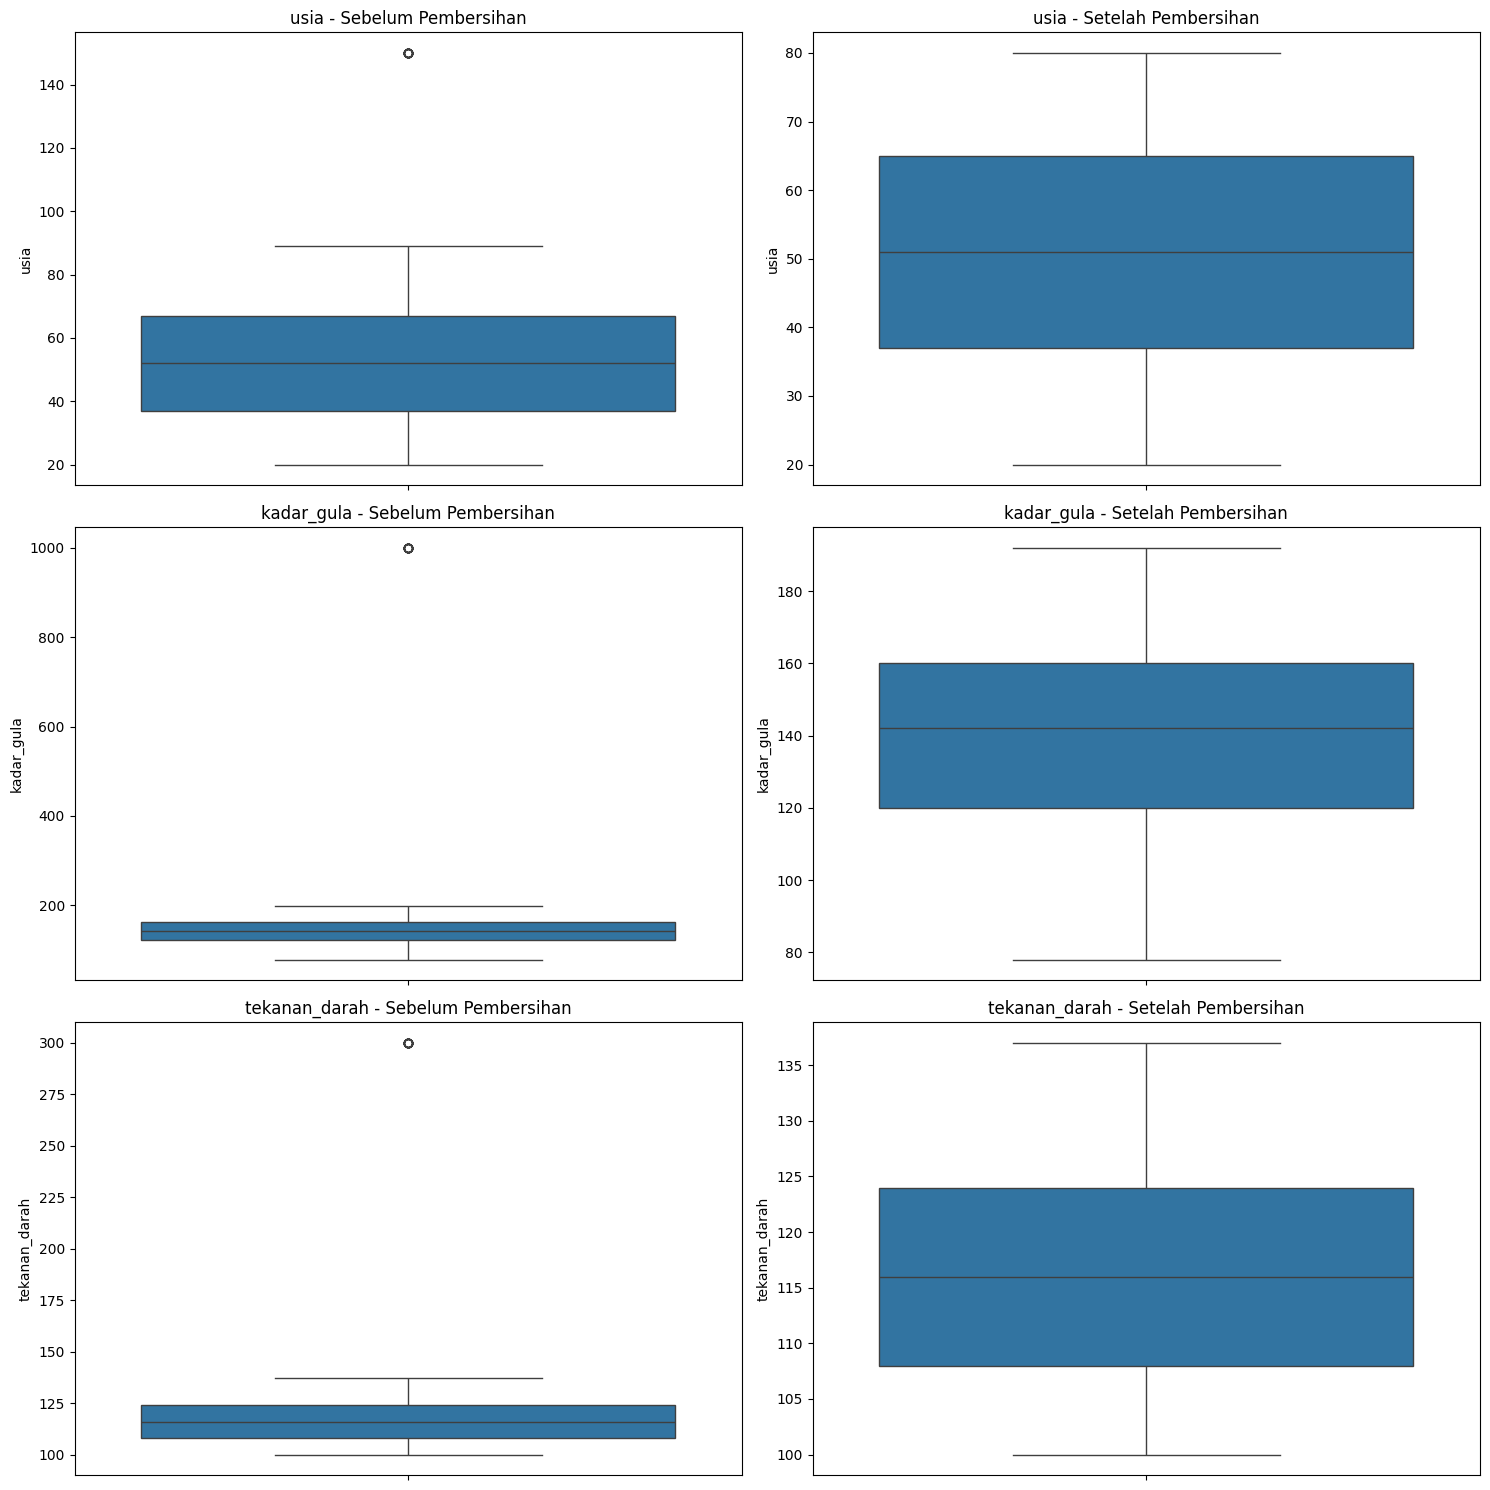

In [96]:
def remove_outliers(df, columns):
    
    df_clean = df.copy()
    
    # Simpan jumlah outlier yang ditemukan per kolom
    outliers_per_column = {}
    
    # Kumpulkan index baris yang akan dihapus
    rows_to_drop = set()
    
    for col in columns:
        # Hitung Q1, Q3, dan IQR
        q1 = df_clean[col].quantile(0.25)
        q3 = df_clean[col].quantile(0.75)
        iqr = q3 - q1
        
        # Tentukan batas outlier
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # Temukan indeks baris dengan outlier
        outlier_indices = df_clean[(df_clean[col] < lower_bound) | 
                                   (df_clean[col] > upper_bound)].index
        
        # Simpan jumlah outlier untuk kolom ini
        outliers_per_column[col] = len(outlier_indices)
        
        # Tambahkan ke set baris yang akan dihapus
        rows_to_drop.update(outlier_indices)
    
    # Hapus semua baris yang mengandung outlier
    df_clean = df_clean.drop(index=rows_to_drop)
    
    # Reset index
    df_clean = df_clean.reset_index(drop=True)
    
    print("Jumlah outlier yang ditemukan per kolom:")
    for col, count in outliers_per_column.items():
        print(f"  {col}: {count} outlier")
    print(f"Total baris yang dihapus: {len(rows_to_drop)}")
    
    return df_clean

# Terapkan fungsi penghapusan outlier
numeric_cols = ['usia', 'kadar_gula', 'tekanan_darah']
df_clean = remove_outliers(df, numeric_cols)

#hapus data usia yang lebih dari 80
df_clean = df_clean[df_clean['usia'] <= 80]
# Bandingkan jumlah baris sebelum dan sesudah pembersihan
print(f"Jumlah baris sebelum pembersihan: {len(df)}")
print(f"Jumlah baris setelah pembersihan: {len(df_clean)}")

# Tampilkan statistik deskriptif sebelum dan sesudah pembersihan
print("\nStatistik sebelum pembersihan:")
print(df[numeric_cols].describe())

print("\nStatistik setelah pembersihan:")
print(df_clean[numeric_cols].describe())

# Visualisasi perbandingan distribusi sebelum dan sesudah pembersihan
fig, axes = plt.subplots(len(numeric_cols), 2, figsize=(15, 5*len(numeric_cols)))

for i, col in enumerate(numeric_cols):
    # Sebelum pembersihan
    sns.boxplot(y=df[col], ax=axes[i, 0])
    axes[i, 0].set_title(f'{col} - Sebelum Pembersihan')
    
    # Setelah pembersihan
    sns.boxplot(y=df_clean[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} - Setelah Pembersihan')

plt.tight_layout()
plt.show()


In [97]:
df_clean.head(10)

,id_pasien,nama,usia,tekanan_darah,kadar_gula,jenis_kelamin,alamat,diagnosa
0,P0001,Anto Sartika,62.000000,123.0,127.0,laki-laki,"Jl. Melur No.71, Medan",Pra-diabetes
1,P0002,Nina Wati,70.000000,121.0,169.0,Laki,"Jalan Kenanga No.26, Medan",Diabetes Tipe 2
2,P0003,Rahmat Aminah,38.000000,100.0,161.0,Laki,"Jl. Melur No.47, Surabaya",Pra-diabetes
3,P0004,Siti Saputra,25.000000,100.0,166.0,L,"Jl. Anggrek No.52, Medan",Tidak Diabetes
4,P0005,Andi Wati,49.000000,110.0,131.0,perempuan,"Perum Griya Indah No.74, Medan",Diabetes Tipe 2
5,P0006,Linda Prasetyo,40.000000,122.0,137.0,laki-laki,"Jl. Anggrek No.3, Bandung",Tidak Diabetes
6,P0007,Rudi Agustin,57.000000,114.0,125.0,perempuan,"Jl. Melur No.15, Bandung",Tidak Diabetes
7,P0008,Rahmat Wati,69.000000,120.0,150.0,L,"Jl. Melur No.59, Jakarta",Diabetes Tipe 2
8,P0009,Rudi Aminah,54.442149,108.0,149.0,L,"Jalan Mawar No.40, Bandung",Diabetes Tipe 2
9,P0010,Siti Saputra,71.000000,125.0,120.0,p,"Jl. Merdeka No.19, Yogyakarta",Pra-diabetes


# Normalisasi Kolom Gender dan Diagnosa

In [98]:
print("Nilai unik jenis_kelamin sebelum normalisasi:", df_clean['jenis_kelamin'].unique())
print("Nilai unik diagnosa sebelum normalisasi:", df_clean['diagnosa'].unique())

gender_mapping ={
    'L':'L', 'l':'L', 'laki-laki':'L', 'Laki' : 'L',
    'P':'P', 'p':'P', 'perempuan':'P'
}
df_clean['jenis_kelamin'] = df_clean['jenis_kelamin'].map(lambda x: gender_mapping.get(x, x))

#ubah nilai pada kolom diagnosa tadinya 'tidak diabetes' menjadi 'normal'
df_clean['diagnosa'] = df_clean['diagnosa'].replace({'Tidak Diabetes': 'Normal'})
print("\nNilai unik jenis_kelamin setelah normalisasi:", df_clean['jenis_kelamin'].unique())
print("Nilai unik diagnosa setelah normalisasi:", df_clean['diagnosa'].unique())

# Hitung jumlah per kategori
print("\nJumlah per kategori jenis kelamin:")
print(df_clean['jenis_kelamin'].value_counts())

print("\nJumlah per kategori diagnosa:")
print(df_clean['diagnosa'].value_counts())

Nilai unik jenis_kelamin sebelum normalisasi: ['laki-laki' 'Laki' 'L' 'perempuan' 'p' 'P']
Nilai unik diagnosa sebelum normalisasi: ['Pra-diabetes' 'Diabetes Tipe 2' 'Tidak Diabetes' 'Diabetes Tipe 1']

Nilai unik jenis_kelamin setelah normalisasi: ['L' 'P']
Nilai unik diagnosa setelah normalisasi: ['Pra-diabetes' 'Diabetes Tipe 2' 'Normal' 'Diabetes Tipe 1']

Jumlah per kategori jenis kelamin:
jenis_kelamin
P    254
L    194
Name: count, dtype: int64

Jumlah per kategori diagnosa:
diagnosa
Normal             117
Diabetes Tipe 2    112
Diabetes Tipe 1    111
Pra-diabetes       108
Name: count, dtype: int64


# Visualisasi 

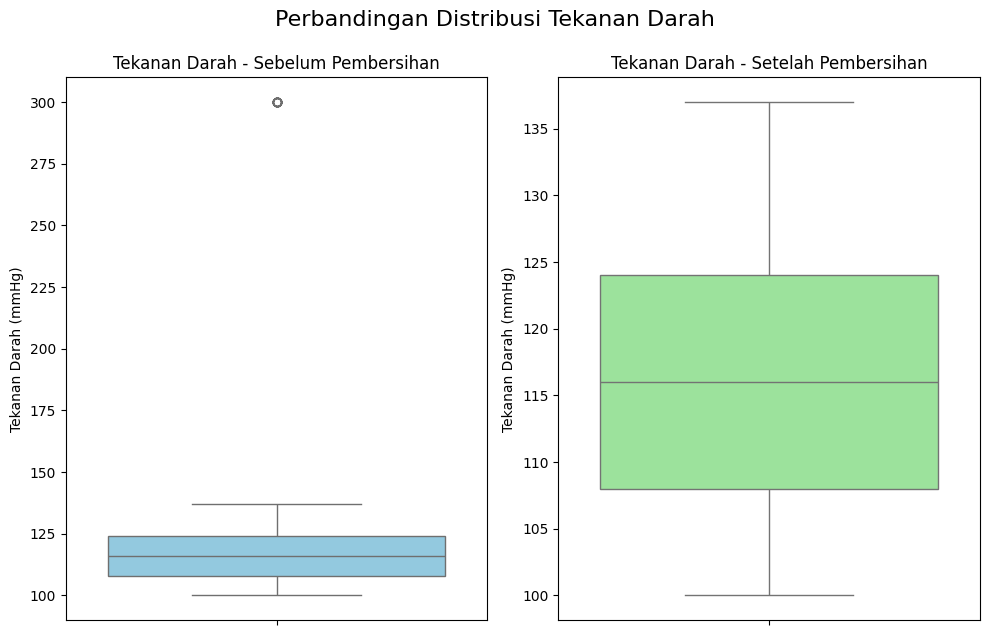

Statistik tekanan_darah sebelum pembersihan:
count    500.000000
mean     122.574000
std       36.386157
min      100.000000
25%      108.000000
50%      116.000000
75%      124.000000
max      300.000000
Name: tekanan_darah, dtype: float64

Statistik tekanan_darah setelah pembersihan:
count    448.000000
mean     115.517857
std        9.026416
min      100.000000
25%      108.000000
50%      116.000000
75%      124.000000
max      137.000000
Name: tekanan_darah, dtype: float64

Jumlah outlier pada tekanan_darah: 0
Batas bawah: 84.0, Batas atas: 148.0


In [103]:
# Visualisasi outlier dengan boxplot pada kolom tekanan_darah
plt.figure(figsize=(10, 6))

# Boxplot untuk dataset sebelum pembersihan
plt.subplot(1, 2, 1)
sns.boxplot(y=df['tekanan_darah'], color='skyblue')
plt.title('Tekanan Darah - Sebelum Pembersihan')
plt.ylabel('Tekanan Darah (mmHg)')

# Boxplot untuk dataset setelah pembersihan
plt.subplot(1, 2, 2)
sns.boxplot(y=df_clean['tekanan_darah'], color='lightgreen')
plt.title('Tekanan Darah - Setelah Pembersihan')
plt.ylabel('Tekanan Darah (mmHg)')

plt.tight_layout()
plt.suptitle('Perbandingan Distribusi Tekanan Darah', fontsize=16, y=1.05)
plt.show()

# Statistik deskriptif untuk kolom tekanan_darah
print("Statistik tekanan_darah sebelum pembersihan:")
print(df['tekanan_darah'].describe())

print("\nStatistik tekanan_darah setelah pembersihan:")
print(df_clean['tekanan_darah'].describe())

# Jumlah outlier pada kolom tekanan_darah
q1 = df['tekanan_darah'].quantile(0.25)
q3 = df['tekanan_darah'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df_clean[(df_clean['tekanan_darah'] < lower_bound) | (df_clean['tekanan_darah'] > upper_bound)]
print(f"\nJumlah outlier pada tekanan_darah: {len(outliers)}")
print(f"Batas bawah: {lower_bound}, Batas atas: {upper_bound}")

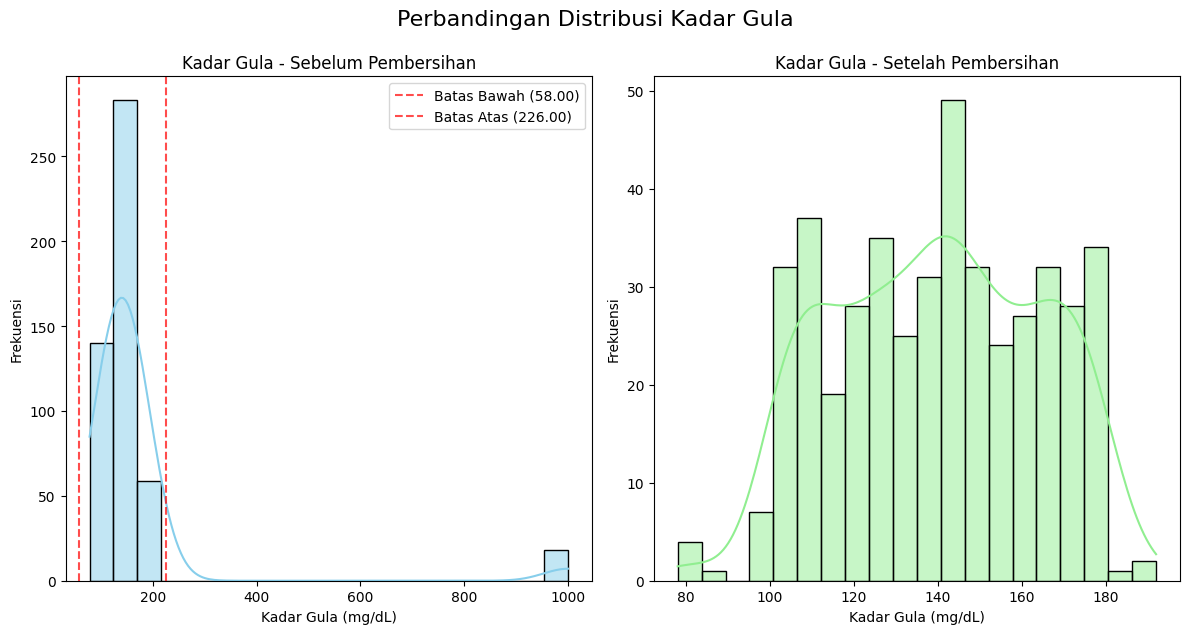

Statistik kadar_gula sebelum pembersihan:
count     500.000000
mean      170.870000
std       162.189865
min        78.000000
25%       121.000000
50%       142.000000
75%       163.000000
max      1000.000000
Name: kadar_gula, dtype: float64

Statistik kadar_gula setelah pembersihan:
count    448.000000
mean     139.685268
std       24.402416
min       78.000000
25%      120.000000
50%      142.000000
75%      160.250000
max      192.000000
Name: kadar_gula, dtype: float64

Jumlah outlier pada kadar_gula: 0
Batas bawah: 58.00, Batas atas: 226.00


In [104]:
# Visualisasi histogram untuk kolom kadar_gula
plt.figure(figsize=(12, 6))

# Histogram kadar gula sebelum pembersihan
plt.subplot(1, 2, 1)
sns.histplot(df['kadar_gula'], bins=20, kde=True, color='skyblue')
plt.title('Kadar Gula - Sebelum Pembersihan')
plt.xlabel('Kadar Gula (mg/dL)')
plt.ylabel('Frekuensi')

# Menandai batas outlier
q1 = df['kadar_gula'].quantile(0.25)
q3 = df['kadar_gula'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

plt.axvline(x=lower_bound, color='red', linestyle='--', alpha=0.7, label=f'Batas Bawah ({lower_bound:.2f})')
plt.axvline(x=upper_bound, color='red', linestyle='--', alpha=0.7, label=f'Batas Atas ({upper_bound:.2f})')
plt.legend()

# Histogram kadar gula setelah pembersihan
plt.subplot(1, 2, 2)
sns.histplot(df_clean['kadar_gula'], bins=20, kde=True, color='lightgreen')
plt.title('Kadar Gula - Setelah Pembersihan')
plt.xlabel('Kadar Gula (mg/dL)')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.suptitle('Perbandingan Distribusi Kadar Gula', fontsize=16, y=1.05)
plt.show()

# Statistik deskriptif untuk kolom kadar_gula
print("Statistik kadar_gula sebelum pembersihan:")
print(df['kadar_gula'].describe())

print("\nStatistik kadar_gula setelah pembersihan:")
print(df_clean['kadar_gula'].describe())

# Jumlah outlier pada kolom kadar_gula
outliers_kadar_gula = df_clean[(df_clean['kadar_gula'] < lower_bound) | (df_clean['kadar_gula'] > upper_bound)]
print(f"\nJumlah outlier pada kadar_gula: {len(outliers_kadar_gula)}")
print(f"Batas bawah: {lower_bound:.2f}, Batas atas: {upper_bound:.2f}")

C:\Users\dzak\AppData\Local\Temp\ipykernel_9312\1634015984.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=diagnosa_counts.index, y=diagnosa_counts.values,
C:\Users\dzak\AppData\Local\Temp\ipykernel_9312\1634015984.py:8: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=diagnosa_counts.index, y=diagnosa_counts.values,


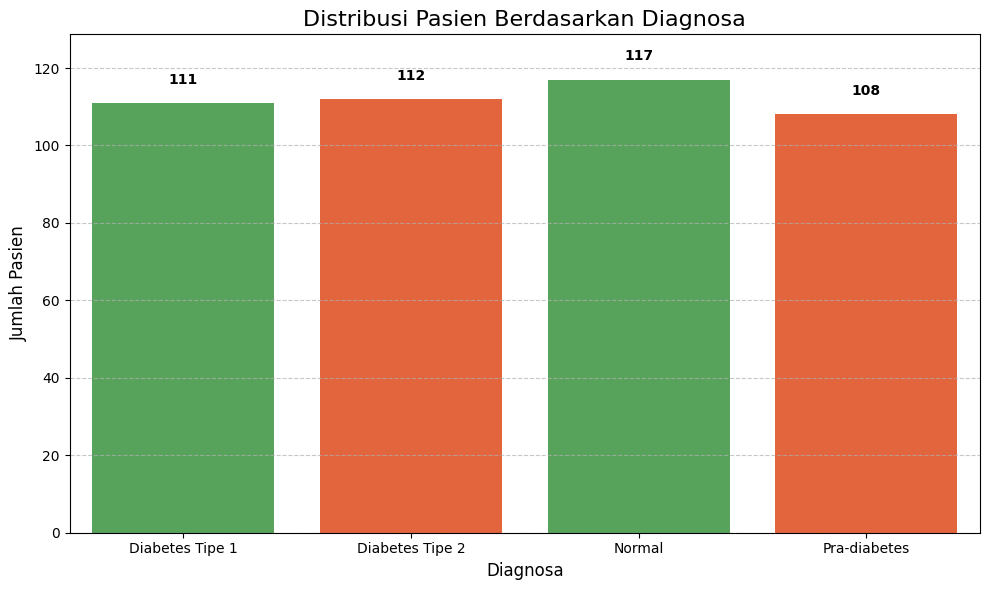

Persentase pasien per kategori diagnosa:
Diabetes Tipe 1: 24.8%
Diabetes Tipe 2: 25.0%
Normal: 26.1%
Pra-diabetes: 24.1%


In [105]:
# Visualisasi distribusi pasien berdasarkan diagnosa
plt.figure(figsize=(10, 6))

# Bar chart untuk data yang sudah dinormalisasi
diagnosa_counts = df_clean['diagnosa'].value_counts().sort_index()

# Plot bar chart dengan warna yang berbeda per kategori
ax = sns.barplot(x=diagnosa_counts.index, y=diagnosa_counts.values, 
            palette=['#4CAF50', '#FF5722'])  # Hijau untuk Normal, Oranye untuk Diabetes

# Tambahkan label jumlah di atas bar
for i, count in enumerate(diagnosa_counts.values):
    plt.text(i, count + 5, str(count), ha='center', fontweight='bold')

# Pengaturan label dan judul
plt.title('Distribusi Pasien Berdasarkan Diagnosa', fontsize=16)
plt.xlabel('Diagnosa', fontsize=12)
plt.ylabel('Jumlah Pasien', fontsize=12)
plt.ylim(0, max(diagnosa_counts.values) * 1.1)  # Memberikan ruang untuk label jumlah

# Tambahkan grid untuk memudahkan pembacaan
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Hitung dan tampilkan persentase untuk setiap kategori
diagnosa_percent = (diagnosa_counts / diagnosa_counts.sum() * 100).round(1)
print("Persentase pasien per kategori diagnosa:")
for diagnosa, percent in diagnosa_percent.items():
    print(f"{diagnosa}: {percent}%")